<a href="https://colab.research.google.com/github/HuaiyuZhang/DeepLearning/blob/main/OpenMMLab-Camp/Notes/MMPretrain_DogCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMPretrain Hands-on Tutorial

In [ ]:
!git clone https://github.com/open-mmlab/mmpretrain.git
%cd mmpretrain
!pip install -U openmim && mim install -e .
# Multimodal support
!mim install -e ".[multimodal]"

## An Example

In [2]:
import mmpretrain
print(mmpretrain.__version__)

1.0.0rc8


In [26]:
from mmpretrain import get_model, list_models, inference_model
# Show the available models under Image Classification task bucket
list_models(task='Image Classification', pattern='resnet18')

['resnet18_8xb16_cifar10', 'resnet18_8xb32_in1k']

In [27]:
# Show the available models under Image Caption task bucket
list_models(task='Image Caption', pattern='blip')

['blip-base_3rdparty_caption', 'blip2-opt2.7b_3rdparty-zeroshot_caption']

In [28]:
# Example using a resnet18 to make inference of a photo
model=get_model('resnet18_8xb32_in1k')

In [29]:
type(model)

mmpretrain.models.classifiers.image.ImageClassifier

In [30]:
type(model.backbone)

mmpretrain.models.backbones.resnet.ResNet

In [31]:
!wget "https://www.thesprucepets.com/thmb/APYdMl_MTqwODmH4dDqaY5q0UoE=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/all-about-tabby-cats-552489-hero-a23a9118af8c477b914a0a1570d4f787.jpg" -O cat.jpg

--2023-06-07 18:51:38--  https://www.thesprucepets.com/thmb/APYdMl_MTqwODmH4dDqaY5q0UoE=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/all-about-tabby-cats-552489-hero-a23a9118af8c477b914a0a1570d4f787.jpg
Resolving www.thesprucepets.com (www.thesprucepets.com)... 151.101.2.137, 151.101.66.137, 151.101.130.137, ...
Connecting to www.thesprucepets.com (www.thesprucepets.com)|151.101.2.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73284 (72K) [image/webp]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>]  71.57K  --.-KB/s    in 0.004s  

2023-06-07 18:51:38 (16.4 MB/s) - ‘cat.jpg’ saved [73284/73284]



In [32]:
inference_model(model, 'cat.jpg', show=True)

{'pred_scores': array([0.00099078, 0.00095525, 0.00104077, 0.00102871, 0.00097876,
        0.00097597, 0.0009709 , 0.0010154 , 0.00099319, 0.00103723,
        0.00094231, 0.00099352, 0.00094541, 0.00094806, 0.00096863,
        0.00095431, 0.00100878, 0.00105525, 0.00096742, 0.00102403,
        0.00099333, 0.00097282, 0.00101315, 0.00099493, 0.00099414,
        0.00095468, 0.00098674, 0.00097473, 0.0010629 , 0.00097941,
        0.0009358 , 0.00095792, 0.00099309, 0.00094925, 0.00095977,
        0.00096689, 0.00102509, 0.00096532, 0.00103219, 0.00101694,
        0.00100167, 0.00099051, 0.00096495, 0.00096994, 0.00100688,
        0.00105754, 0.00100278, 0.00102341, 0.0010366 , 0.0009953 ,
        0.00098341, 0.00097974, 0.00094379, 0.00105923, 0.00097336,
        0.00098404, 0.00102225, 0.00101696, 0.00101176, 0.00102641,
        0.00101961, 0.00101598, 0.00101888, 0.00102637, 0.00103577,
        0.00103177, 0.00096993, 0.00095676, 0.00101587, 0.00105165,
        0.00096189, 0.00098884, 0

Well, impressive, the photo of cat is classfied as "burrito". But this is only an example, a bad one, to showcase the usage.

## A deeper look at the config files
The config files defines the orchestration of a pipeline.

In [3]:
!ls /content/mmpretrain/configs/resnet

metafile.yml			      resnet50_8xb256-rsb-a2-300e_in1k.py
README.md			      resnet50_8xb256-rsb-a3-100e_in1k.py
resnet101_8xb16_cifar10.py	      resnet50_8xb32-coslr_in1k.py
resnet101_8xb32_in1k.py		      resnet50_8xb32-coslr-preciseBN_in1k.py
resnet152_8xb16_cifar10.py	      resnet50_8xb32-cutmix_in1k.py
resnet152_8xb32_in1k.py		      resnet50_8xb32-fp16-dynamic_in1k.py
resnet18_8xb16_cifar10.py	      resnet50_8xb32-fp16_in1k.py
resnet18_8xb32_in1k.py		      resnet50_8xb32_in1k.py
resnet34_8xb16_cifar10.py	      resnet50_8xb32-lbs_in1k.py
resnet34_8xb32_in1k.py		      resnet50_8xb32-mixup_in1k.py
resnet50_32xb64-warmup-coslr_in1k.py  resnet50_8xb8_cub.py
resnet50_32xb64-warmup_in1k.py	      resnetv1c101_8xb32_in1k.py
resnet50_32xb64-warmup-lbs_in1k.py    resnetv1c152_8xb32_in1k.py
resnet50_8xb128_coslr-90e_in21k.py    resnetv1c50_8xb32_in1k.py
resnet50_8xb16_cifar100.py	      resnetv1d101_8xb32_in1k.py
resnet50_8xb16_cifar10.py	      resnetv1d152_8xb32_in1k.py
resnet50_8xb16-mixup_cifa

In [34]:
!cat /content/mmpretrain/configs/resnet/resnet18_8xb32_in1k.py

_base_ = [
    '../_base_/models/resnet18.py', '../_base_/datasets/imagenet_bs32.py',
    '../_base_/schedules/imagenet_bs256.py', '../_base_/default_runtime.py'
]


## The 'model' file

In [35]:

!cat /content/mmpretrain/configs/_base_/models/resnet18.py

# model settings
model = dict(
    type='ImageClassifier',
    backbone=dict(
        type='ResNet',
        depth=18,
        num_stages=4,
        out_indices=(3, ),
        style='pytorch'),
    neck=dict(type='GlobalAveragePooling'),
    head=dict(
        type='LinearClsHead',
        num_classes=1000,
        in_channels=512,
        loss=dict(type='CrossEntropyLoss', loss_weight=1.0),
        topk=(1, 5),
    ))


The `backbone` extracts the features. The `neck` is a feature precessing layer to connect the backbone and the head. The `head` defines a proper structure for a specific task type.

`type='ImageClassifier'` refers to the ImageClassifier class, which is defined below. In the definition, `backbone`, `neck`, `head` are arguments.

In [36]:
# from mmpretrain.models import ImageClassifier
# import inspect
# print(inspect.getsource(ImageClassifier))

In [37]:
# Interact with the config files
from mmengine import Config
cfg = Config.fromfile("/content/mmpretrain/configs/_base_/models/resnet18.py")
cfg.model

{'type': 'ImageClassifier',
 'backbone': {'type': 'ResNet',
  'depth': 18,
  'num_stages': 4,
  'out_indices': (3,),
  'style': 'pytorch'},
 'neck': {'type': 'GlobalAveragePooling'},
 'head': {'type': 'LinearClsHead',
  'num_classes': 1000,
  'in_channels': 512,
  'loss': {'type': 'CrossEntropyLoss', 'loss_weight': 1.0},
  'topk': (1, 5)}}

In [38]:
cfg.model.head.num_classes=10
cfg.model

{'type': 'ImageClassifier',
 'backbone': {'type': 'ResNet',
  'depth': 18,
  'num_stages': 4,
  'out_indices': (3,),
  'style': 'pytorch'},
 'neck': {'type': 'GlobalAveragePooling'},
 'head': {'type': 'LinearClsHead',
  'num_classes': 10,
  'in_channels': 512,
  'loss': {'type': 'CrossEntropyLoss', 'loss_weight': 1.0},
  'topk': (1, 5)}}

## The 'datasets' file

In [39]:
!cat /content/mmpretrain/configs/_base_/datasets/imagenet_bs32.py

# dataset settings
dataset_type = 'ImageNet'
data_preprocessor = dict(
    num_classes=1000,
    # RGB format normalization parameters
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    # convert image from BGR to RGB
    to_rgb=True,
)

train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='RandomResizedCrop', scale=224),
    dict(type='RandomFlip', prob=0.5, direction='horizontal'),
    dict(type='PackInputs'),
]

test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='ResizeEdge', scale=256, edge='short'),
    dict(type='CenterCrop', crop_size=224),
    dict(type='PackInputs'),
]

train_dataloader = dict(
    batch_size=32,
    num_workers=5,
    dataset=dict(
        type=dataset_type,
        data_root='data/imagenet',
        ann_file='meta/train.txt',
        data_prefix='train',
        pipeline=train_pipeline),
    sampler=dict(type='DefaultSampler', shuffle=True),
)

val_dataloader = dict(
    batch_size=32,
    num_workers=5,

## The 'scheduler' file

- `auto_scale_lr` example:

    batch_size=256 -> lr=0.1

    batch_size=256/8=32 -> lr=0.1/32=0.003125
- `milestones=[30, 60, 90], gamma=0.1`
    
    At step 30, 60, 90, reduce the lr to 1/10 of the current lr.

In [40]:
!cat /content/mmpretrain/configs/_base_/schedules/imagenet_bs256.py

# optimizer
optim_wrapper = dict(
    optimizer=dict(type='SGD', lr=0.1, momentum=0.9, weight_decay=0.0001))

# learning policy
param_scheduler = dict(
    type='MultiStepLR', by_epoch=True, milestones=[30, 60, 90], gamma=0.1)

# train, val, test setting
train_cfg = dict(by_epoch=True, max_epochs=100, val_interval=1)
val_cfg = dict()
test_cfg = dict()

# NOTE: `auto_scale_lr` is for automatically scaling LR,
# based on the actual training batch size.
auto_scale_lr = dict(base_batch_size=256)


## The 'runtime' file

- `logger=dict(type='LoggerHook', interval=100)`
    
    Save log for every 100 steps

- `checkpoint=dict(type='CheckpointHook', interval=1)`

    Save path file at a frequency of `interval`. Available options: max_keep_ckpt=5, save_best='auto'

In [41]:
!cat /content/mmpretrain/configs/_base_/default_runtime.py

# defaults to use registries in mmpretrain
default_scope = 'mmpretrain'

# configure default hooks
default_hooks = dict(
    # record the time of every iteration.
    timer=dict(type='IterTimerHook'),

    # print log every 100 iterations.
    logger=dict(type='LoggerHook', interval=100),

    # enable the parameter scheduler.
    param_scheduler=dict(type='ParamSchedulerHook'),

    # save checkpoint per epoch.
    checkpoint=dict(type='CheckpointHook', interval=1),

    # set sampler seed in distributed evrionment.
    sampler_seed=dict(type='DistSamplerSeedHook'),

    # validation results visualization, set True to enable it.
    visualization=dict(type='VisualizationHook', enable=False),
)

# configure environment
env_cfg = dict(
    # whether to enable cudnn benchmark
    cudnn_benchmark=False,

    # set multi process parameters
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0),

    # set distributed parameters
    dist_cfg=dict(backend='nccl'),
)

# set visualizer


# Cat-Dog classifier example

In [ ]:
!cd /content/mmpretrain
!mkdir /content/mmpretrain/projects/cat_dog

# put together the four config files and combine as one file 'resnet18-finetune.py'
# Find checkpoint file in https://mmpretrain.readthedocs.io/en/latest/papers/resnet.html


In [5]:
!wget https://download.openmmlab.com/mmclassification/dataset/cats_dogs_dataset.tar -P /content/mmpretrain/projects/cat_dog

--2023-06-07 19:03:43--  https://download.openmmlab.com/mmclassification/dataset/cats_dogs_dataset.tar
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.48.206, 47.246.48.204, 47.246.48.208, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.48.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236175360 (225M) [application/x-tar]
Saving to: ‘/content/mmpretrain/projects/cat_dog/cats_dogs_dataset.tar’

cats_dogs_dataset.t 100%[===================>] 225.23M  72.6MB/s    in 3.2s    

2023-06-07 19:03:47 (69.8 MB/s) - ‘/content/mmpretrain/projects/cat_dog/cats_dogs_dataset.tar’ saved [236175360/236175360]



In [6]:
!mkdir /content/mmpretrain/projects/cat_dog/data

In [7]:
!tar -xf /content/mmpretrain/projects/cat_dog/cats_dogs_dataset.tar -C /content/mmpretrain/projects/cat_dog/data

In [16]:
!wget https://raw.githubusercontent.com/HuaiyuZhang/DeepLearning/main/OpenMMLab-Camp/Notes/resnet18-finetune.py -P /content/mmpretrain/projects/cat_dog

--2023-06-07 19:05:46--  https://raw.githubusercontent.com/HuaiyuZhang/DeepLearning/main/OpenMMLab-Camp/Notes/resnet18-finetune.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4134 (4.0K) [text/plain]
Saving to: ‘/content/mmpretrain/projects/cat_dog/resnet18-finetune.py’

resnet18-finetune.p 100%[===================>]   4.04K  --.-KB/s    in 0s      

2023-06-07 19:05:46 (71.5 MB/s) - ‘/content/mmpretrain/projects/cat_dog/resnet18-finetune.py’ saved [4134/4134]



In [17]:
!ls /content/mmpretrain/projects/cat_dog

cats_dogs_dataset.tar  data  resnet18-finetune.py


In [18]:
!python /content/mmpretrain/tools/train.py /content/mmpretrain/projects/cat_dog/resnet18-finetune.py --work-dir=/content/mmpretrain/projects/cat_dog

06/07 19:05:54 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 566988791
    GPU 0: Tesla V100-SXM2-16GB
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch

In [19]:
# !mim train mmpretrain /content/mmpretrain/projects/cat_dog/resnet18-finetune.py --work-dir=/content/mmpretrain/projects/cat_dog

In [28]:
!mim test mmpretrain /content/mmpretrain/projects/cat_dog/resnet18-finetune.py --work-dir=/content/mmpretrain/projects/cat_dog --checkpoint=/content/mmpretrain/projects/cat_dog/epoch_5.pth --out=/content/mmpretrain/projects/cat_dog/result.pkl


Testing command is /usr/bin/python3 /content/mmpretrain/mmpretrain/.mim/tools/test.py /content/mmpretrain/projects/cat_dog/resnet18-finetune.py /content/mmpretrain/projects/cat_dog/epoch_5.pth --launcher none --work-dir=/content/mmpretrain/projects/cat_dog --out=/content/mmpretrain/projects/cat_dog/result.pkl. 
06/07 19:27:16 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 1485927176
    GPU 0: Tesla V100-SXM2-16GB
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - I

In [30]:
!mim run mmpretrain confusion_matrix /content/mmpretrain/projects/cat_dog/resnet18-finetune.py /content/mmpretrain/projects/cat_dog/result.pkl --show --include-values

Use the script /content/mmpretrain/mmpretrain/.mim/tools/analysis_tools/confusion_matrix.py for command confusion_matrix.
The command to call is /usr/bin/python3 /content/mmpretrain/mmpretrain/.mim/tools/analysis_tools/confusion_matrix.py /content/mmpretrain/projects/cat_dog/resnet18-finetune.py /content/mmpretrain/projects/cat_dog/result.pkl --show --include-values. 
Figure(1000x1000)
The script finished successfully.


In [31]:
# Prediction
from mmpretrain import ImageClassificationInferencer
inferencer=ImageClassificationInferencer(
    '/content/mmpretrain/projects/cat_dog/resnet18-finetune.py', 
    pretrained='/content/mmpretrain/projects/cat_dog/epoch_5.pth'                  )

Loads checkpoint by local backend from path: /content/mmpretrain/projects/cat_dog/epoch_5.pth


In [34]:
!wget "https://www.thesprucepets.com/thmb/APYdMl_MTqwODmH4dDqaY5q0UoE=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/all-about-tabby-cats-552489-hero-a23a9118af8c477b914a0a1570d4f787.jpg" -P /content/mmpretrain/projects/cat_dog/
inferencer('/content/mmpretrain/projects/cat_dog/cat.jpg', show_dir="/content/mmpretrain/projects/cat_dog")

[{'pred_scores': array([9.9999917e-01, 8.2998866e-07], dtype=float32),
  'pred_label': 0,
  'pred_score': 0.9999991655349731,
  'pred_class': 'cats'}]

<ipython-input-36-a5b5a09b1c7c>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('/content/mmpretrain/projects/cat_dog/cat.png')


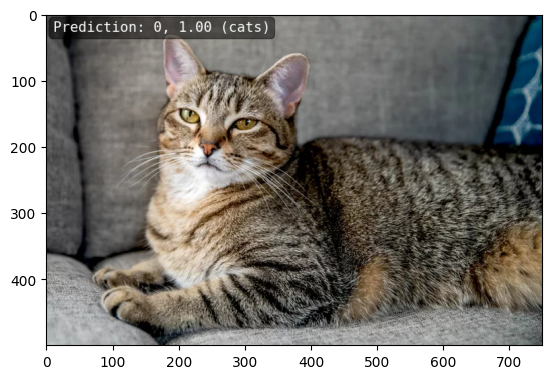

In [36]:
import matplotlib.pyplot as plt
import imageio

img = imageio.imread('/content/mmpretrain/projects/cat_dog/cat.png')
plt.imshow(img)
plt.show()

Perfect prediction!